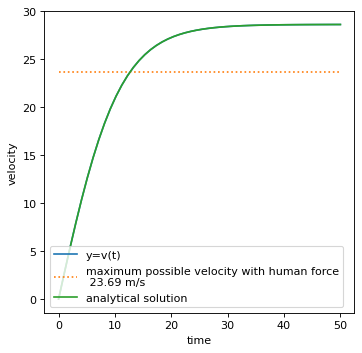

In [144]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

m = 1 # kg
k_air=0.00324844 # kg/m
F_M = 12.2 # N/kg
g = 9.8 # m/s^2
miu = 0.6
r_wheel = 0.75 # m
theta = 10

A=F_M-(m*g*miu)/(r_wheel)-m*g*(math.sin(math.pi*theta/180.00))

# function that returns dy/dt
def velocity(v,t):
    dvdt = ( F_M-k_air*(v**2)-(m*g*miu)/(r_wheel)-m*g*(math.sin(math.pi*theta/180.00)) )/m
    return dvdt

# initial condition
v0 = 0

# time points
t = np.linspace(0,50)

# solve ODE
v = odeint(velocity,v0,t)
analytical = [0 for i in range(len(t))]
for i in range(len(t)):
    analytical[i] = (math.sqrt(A)*np.tanh( (t[i]*math.sqrt(A*k_air))/m ))/(math.sqrt(k_air))

l = [23.69322586 for i in range (len(t))]
fig = plt.figure(figsize=(5,5), dpi=80)
# plot results
plt.plot(t,v)
plt.plot(t,l,':')
plt.plot(t,analytical)
plt.xlabel('time')
plt.ylabel('velocity')
plt.legend(['y=v(t)','maximum possible velocity with human force\n 23.69 m/s','analytical solution'])
plt.show()

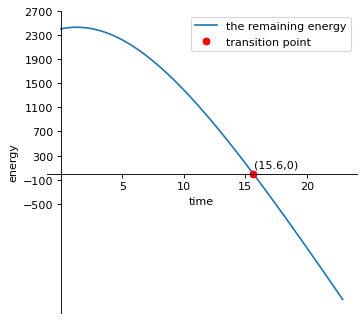

-1088.3121698031928


In [145]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad

LEFT = 0
RIGHT = 23
DOWN = -500
UP = 3000

sigma = 41.5
E_total = 2403.5
INTERVAL = 0.1

t=np.arange(LEFT,RIGHT,INTERVAL)

def integrand(t):
    return (math.sqrt(A)*np.tanh( (t*math.sqrt(A*k_air))/m ))/(math.sqrt(k_air))
def with_bonds(a,b):
    inte=quad(integrand,a,b)
    return inte[0]
    
integral_result = [0 for i in range(len(t))]
for i in range(len(t)):
    integral_result[i] = with_bonds(0,t[i])

energy = [0 for i in range(len(t))]
for i in range(len(t)):
    energy[i] = sigma*t[i] - F_M*integral_result[i]

energy_final = [energy[i]+E_total for i in range(len(t))]


# for the figure itself

fig = plt.figure(figsize=(5,5), dpi=80)

def find_first_zero(theta):
    for i in range(len(t)-1):
        if(energy_final[i]*energy_final[i+1]<=0):
            return round(i*INTERVAL,2)
        else:
            continue
fstzero = find_first_zero(theta)
            
plt.plot(t,energy_final)
plt.plot(fstzero,0,'ro')
plt.annotate('('+str(fstzero)+',0)',xy = (fstzero,0),xytext = (fstzero+INTERVAL,100))
plt.xlabel('time')
plt.ylabel('energy')
plt.legend(['the remaining energy','transition point'])
plt.xticks(np.arange(LEFT+5,RIGHT,5))
plt.yticks(np.arange(DOWN,UP,400))
 
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

plt.show()

print(energy_final[195])


443.6663237155498


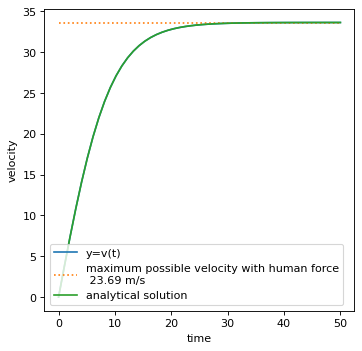

In [120]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

m = 1 # kg
k_air=0.00324844 # kg/m
F_M = 12.2 # N/kg
g = 9.8 # m/s^2
miu = 0.6
r_wheel = 0.75 # m
theta = 4

A=F_M-(m*g*miu)/(r_wheel)-m*g*(math.sin(math.pi*theta/180.00))

# function that returns dy/dt
def velocity(v,t):
    dvdt = ( F_M-k_air*(v**2)-(m*g*miu)/(r_wheel)-m*g*(math.sin(math.pi*theta/180.00)) )/m
    return dvdt

# initial condition
v0 = 0

# time points
t = np.linspace(0,50)

# solve ODE
v = odeint(velocity,v0,t)
analytical = [0 for i in range(len(t))]
for i in range(len(t)):
    analytical[i] = (math.sqrt(A)*np.tanh( (t[i]*math.sqrt(A*k_air))/m ))/(math.sqrt(k_air))

l = [analytical[len(t)-1] for i in range (len(t))]
fig = plt.figure(figsize=(5,5), dpi=80)

print(with_bonds(0,19.4))
# plot results
plt.plot(t,v)
plt.plot(t,l,':')
plt.plot(t,analytical)
plt.xlabel('time')
plt.ylabel('velocity')
plt.legend(['y=v(t)','maximum possible velocity with human force\n 23.69 m/s','analytical solution'])
plt.show()

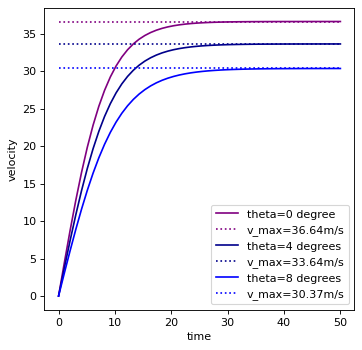

In [53]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

m = 1 # kg
k_air=0.00324844 # kg/m
F_M = 12.2 # N/kg
g = 9.8 # m/s^2
miu = 0.6
r_wheel = 0.75 # m
# theta = 15

INF = 999999

def get_A(theta):
    return (F_M-(m*g*miu)/(r_wheel)-m*g*(math.sin(math.pi*theta/180.00)))

t = np.linspace(0,50)

theta=[0,4,8]
upper=[0,0,0]
A=[0,0,0]
analytical=[[0 for i in range(len(t))] for j in range(3)]
for i in range(3):
    A[i]=get_A(theta[i])
    for j in range(len(t)):
        analytical[i][j] = (math.sqrt(A[i])*np.tanh( (t[j]*math.sqrt(A[i]*k_air))/m ))/(math.sqrt(k_air))
    upper[i] = (math.sqrt(A[i])*np.tanh( (INF*math.sqrt(A[i]*k_air))/m ))/(math.sqrt(k_air))

    
newupper=[[0 for j in range(len(t))] for i in range(3)]
for i in range(3):
    newupper[i]=[upper[i] for j in range(len(t))]
colorset=['purple','darkblue','blue']
fig = plt.figure(figsize=(5,5), dpi=80)
for i in range(3):
    plt.plot(t,analytical[i],c=colorset[i])
    plt.plot(t,newupper[i],':',c=colorset[i])

plt.xlabel('time')
plt.ylabel('velocity')
plt.legend(['theta=0 degree','v_max='+str(round(upper[0],2))+'m/s',
            'theta=4 degrees','v_max='+str(round(upper[1],2))+'m/s',
            'theta=8 degrees','v_max='+str(round(upper[2],2))+'m/s'])
plt.show()    

In [5]:
import numpy as np
from scipy.integrate import odeint
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

def bicycle(v,t,m,k,A,E):
    ( m*dfdt*f* + (1/2)*k*(f**3) )/( m*(ddfdtdt)*f + (dfdt**2) + (3/2)*k*(f**2) ) = A*x+E
    

SyntaxError: cannot assign to operator (<ipython-input-5-4ce974b19793>, line 7)

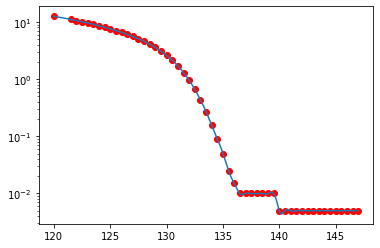

In [6]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

import numpy as np

x = np.array([ 120. ,  121.5,  122. ,  122.5,  123. ,  123.5,  124. ,  124.5,
        125. ,  125.5,  126. ,  126.5,  127. ,  127.5,  128. ,  128.5,
        129. ,  129.5,  130. ,  130.5,  131. ,  131.5,  132. ,  132.5,
        133. ,  133.5,  134. ,  134.5,  135. ,  135.5,  136. ,  136.5,
        137. ,  137.5,  138. ,  138.5,  139. ,  139.5,  140. ,  140.5,
        141. ,  141.5,  142. ,  142.5,  143. ,  143.5,  144. ,  144.5,
        145. ,  145.5,  146. ,  146.5,  147. ])

y = np.array([  1.25750000e+01,   1.10750000e+01,   1.05750000e+01,
         1.00750000e+01,   9.57500000e+00,   9.07500000e+00,
         8.57500000e+00,   8.07500000e+00,   7.57500000e+00,
         7.07500000e+00,   6.57500000e+00,   6.07500000e+00,
         5.57500000e+00,   5.07500000e+00,   4.57500000e+00,
         4.07500000e+00,   3.57500000e+00,   3.07500000e+00,
         2.60500000e+00,   2.14500000e+00,   1.71000000e+00,
         1.30500000e+00,   9.55000000e-01,   6.65000000e-01,
         4.35000000e-01,   2.70000000e-01,   1.55000000e-01,
         9.00000000e-02,   5.00000000e-02,   2.50000000e-02,
         1.50000000e-02,   1.00000000e-02,   1.00000000e-02,
         1.00000000e-02,   1.00000000e-02,   1.00000000e-02,
         1.00000000e-02,   1.00000000e-02,   5.00000000e-03,
         5.00000000e-03,   5.00000000e-03,   5.00000000e-03,
         5.00000000e-03,   5.00000000e-03,   5.00000000e-03,
         5.00000000e-03,   5.00000000e-03,   5.00000000e-03,
         5.00000000e-03,   5.00000000e-03,   5.00000000e-03,
         5.00000000e-03,   5.00000000e-03])

y_spl = UnivariateSpline(x,y,s=0,k=4)

plt.semilogy(x,y,'ro',label = 'data')
x_range = np.linspace(x[0],x[-1],1000)
plt.semilogy(x_range,y_spl(x_range))



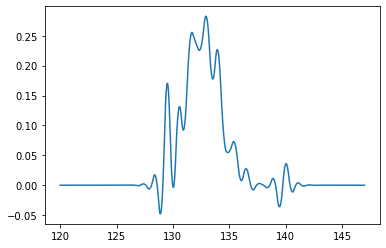

In [7]:
y_spl_2d = y_spl.derivative(n=2)

plt.plot(x_range,y_spl_2d(x_range))

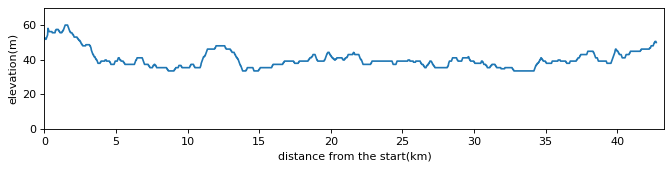

In [96]:
from PIL import Image
import numpy as np
im=Image.open(r"H:\stOOrz-Mathematical-Modelling-Group\MCM-ICM_2022\Images\uci-2.png")
maxns=[0 for i in range(10000)]
for x in range(im.size[0]):
    tot=0
#    print(x)
    for y in range(im.size[1]):
        pix=im.getpixel((x,y))
        if(pix[3]==255):
            tot+=1
        else:
            maxns[x]=max(maxns[x],tot)
            tot=0
        pre=pix
        maxns[x]=max(maxns[x],tot)
# print(maxns[sz-50:sz])
import matplotlib.pyplot as plt
datax = datay = [0 for i in range(im.size[0])]
datax=range(im.size[0])
for i in range(im.size[0]):
    datay[i]=maxns[datax[i]]
sz = im.size[0]
new_data = [0 for i in range(sz)]

stretch = sz/43.3
newdatax = [(i-11)/stretch for i in range(sz)]
newdatay = [datay[i]*52.5/83 for i in range(sz)]

fig=plt.figure(figsize=(10,2),dpi=80)
plt.plot(newdatax[12:sz-9],newdatay[12:sz-9])
plt.ylim(0,70)
plt.xlim(0,43.3)
plt.xlabel('distance from the start(km)')
plt.ylabel('elevation(m)')
plt.show()


In [ ]:
1586/43.3

In [ ]:
95

In [ ]:
math.atan(1000/18000)/math.pi*180

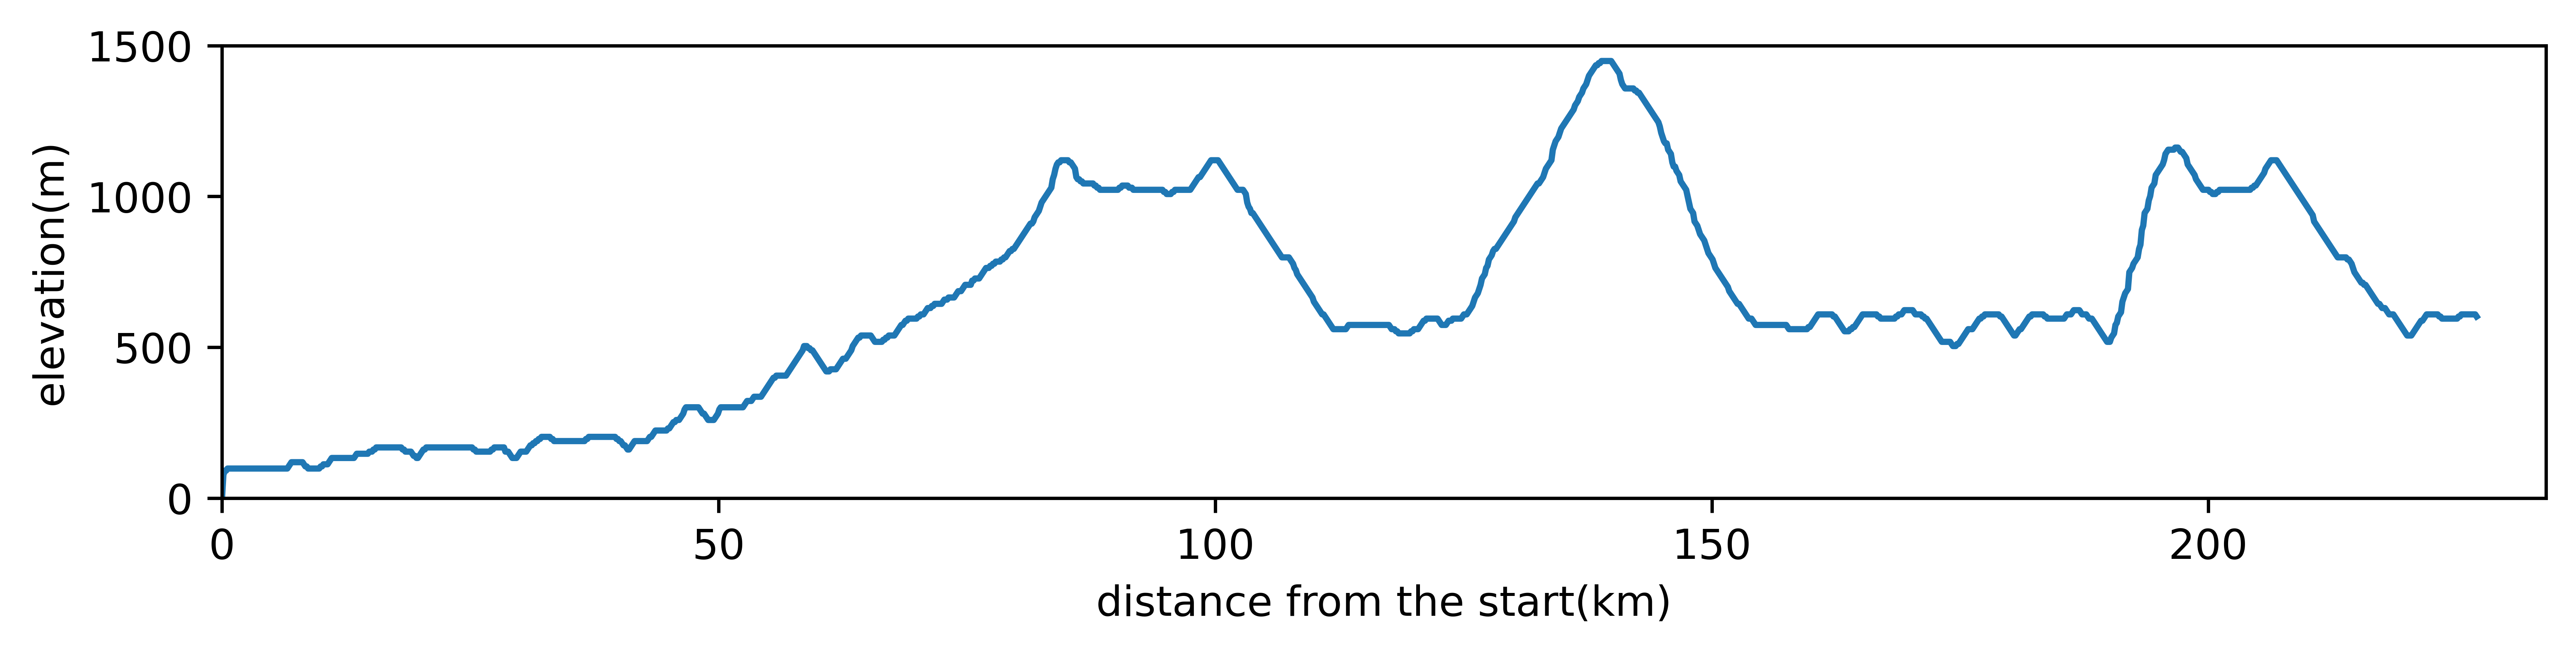

In [108]:
from PIL import Image
im=Image.open(r"H:\stOOrz-Mathematical-Modelling-Group\MCM-ICM_2022\Images\tokyo-course-adjusted2.png")
maxns=[0 for i in range(10000)]
for x in range(im.size[0]):
    tot=0
#     print(x)
    for y in range(im.size[1]):
        pix=im.getpixel((x,y))
        if pix!=(0, 0, 0, 255):
#             print(pix)
            tot=tot+1
    maxns[x]=tot
import matplotlib.pyplot as plt
datax = datay = [0 for i in range(im.size[0])]
datax=range(im.size[0])
for i in range(im.size[0]):
    datay[i]=maxns[datax[i]]
sz = im.size[0]
new_data = [0 for i in range(sz)]

stretch = sz/234
newdatax = [(i-49)/stretch for i in range(sz)]
newdatay = [datay[i]*1400/200 for i in range(sz)]

fig=plt.figure(figsize=(10,2),dpi=800)
plt.plot(newdatax,newdatay)
plt.ylim(0,1500)
plt.xlim(0,234)
plt.xlabel('distance from the start(km)')
plt.ylabel('elevation(m)')
plt.show()

In [103]:
len('0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ')

150

In [143]:
# the relationship between 

import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

m = 1 # kg
k_air=0.00324844 # kg/m
F_M = 12.2 # N/kg
g = 9.8 # m/s^2
miu = 0.6
r_wheel = 0.75 # m
theta = 4
def max_first_phase_distance(theta):
    A=F_M-(m*g*miu)/(r_wheel)-m*g*(math.sin(math.pi*theta/180.00))

    # function that returns dy/dt
    def velocity(v,t):
        dvdt = ( F_M-k_air*(v**2)-(m*g*miu)/(r_wheel)-m*g*(math.sin(math.pi*theta/180.00)) )/m
        return dvdt

    # initial condition
    v0 = 0

    # time points
    t = np.linspace(0,50)

    # solve ODE
    v = odeint(velocity,v0,t)
    analytical = [0 for i in range(len(t))]
    for i in range(len(t)):
        analytical[i] = (math.sqrt(A)*np.tanh( (t[i]*math.sqrt(A*k_air))/m ))/(math.sqrt(k_air))

    l = [analytical[len(t)-1] for i in range (len(t))]

    return with_bonds(0,find_first_zero(theta))
print(max_first_phase_distance(4))

dtx = np.arange(-8,8,0.01)
# dty = [max_first_phase_distance(dtx[i]) for i in range(len(dtx))]
# plt.plot(dtx,dty)
# plt.show()

# for i in range(len(dtx)):
#     print(max_first_phase_distance(dtx[i]))

261.4288341413273
